In [3]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../..")

from tools.curbd import curbd, curbd_gpu, curbd_gpu_v2
import numpy as np
import pylab
import cupy as cp

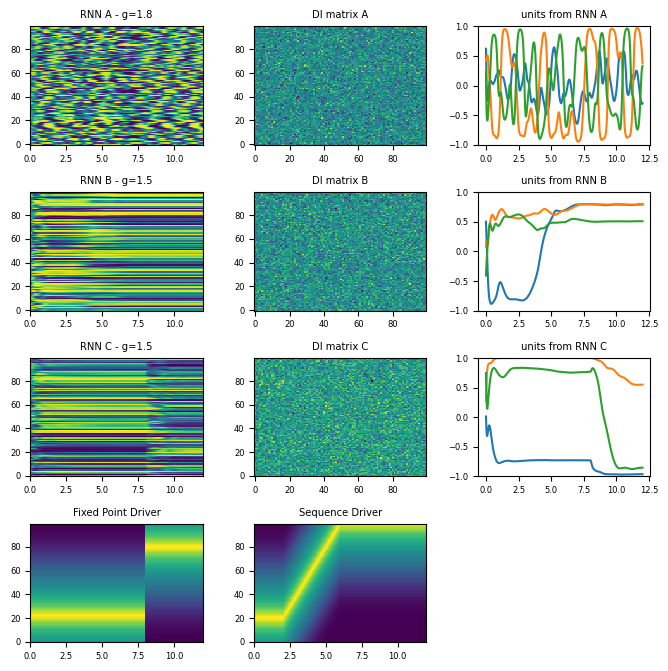

In [43]:
sim_1000 = curbd.threeRegionSim(number_units=100, plotSim=True, T=10)

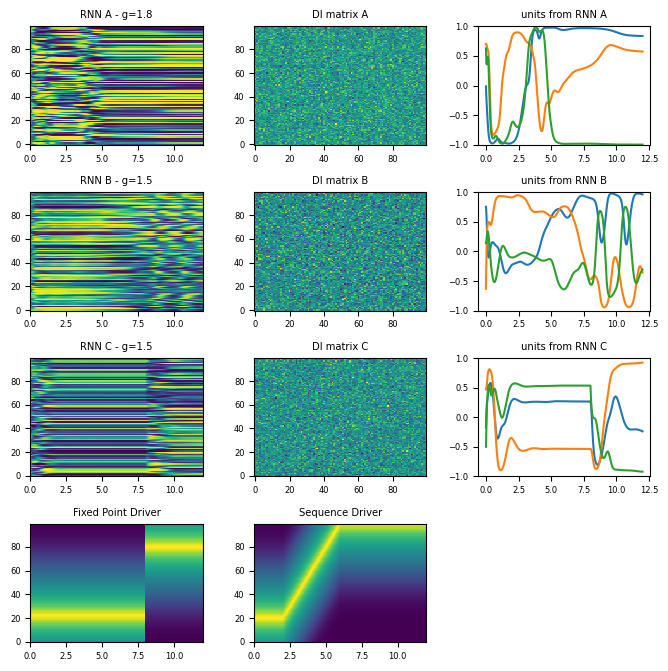

In [72]:
sim = curbd.threeRegionSim(number_units=100, plotSim=True, T=10, dtData=0.01)

In [73]:
# Stack neurons
activity = np.concatenate((sim['Ra'], sim['Rb'], sim['Rc']), 0)  
activity.shape

(300, 1201)

In [74]:
Na = sim['params']['Na']
Nb = sim['params']['Nb']
Nc = sim['params']['Nc']

regions = []
regions.append(['Region A', np.arange(0, Na)])
regions.append(['Region B', np.arange(Na, Na + Nb)])
regions.append(['Region C', np.arange(Na + Nb, Na + Nb + Nc)])
regions = np.array(regions, dtype=object)


model = curbd.trainMultiRegionRNN(activity,
                                  dtData=sim['params']['dtData'],
                                  dtFactor=5,
                                  regions=regions,
                                  tauRNN=2*sim['params']['tau']/2,
                                  nRunTrain=5,
                                  verbose=True,
                                  nRunFree=5,
                                  plotStatus=False)


[curbd_arr, curbd_labels] = curbd.computeCURBD(model)

trial=0 pVar=0.947837 chi2=25.655203
trial=1 pVar=0.981618 chi2=9.328996
trial=2 pVar=0.984193 chi2=7.710097
trial=3 pVar=0.987705 chi2=6.054865
trial=4 pVar=0.989049 chi2=5.417781
trial=5 pVar=0.980448 chi2=8.867997
trial=6 pVar=0.980448 chi2=8.867997
trial=7 pVar=0.980448 chi2=8.867997
trial=8 pVar=0.980448 chi2=8.867997
trial=9 pVar=0.980448 chi2=8.867997


## Testing out own CURBD

In [ ]:
activity = np.concatenate((sim['Ra'], sim['Rb'], sim['Rc']), 0)  
activity = np.concatenate((activity[np.newaxis, :, :], activity[np.newaxis, :, :]))
activity.shape

(2, 300, 1201)

In [ ]:
Na = sim['params']['Na']
Nb = sim['params']['Nb']
Nc = sim['params']['Nc']

regions = []
regions.append(['Region A', np.arange(0, Na)])
regions.append(['Region B', np.arange(Na, Na + Nb)])
regions.append(['Region C', np.arange(Na + Nb, Na + Nb + Nc)])
regions = np.array(regions, dtype=object)


gcurbd = curbd_gpu_v2.gCURBD(
    dt_data=sim['params']['dtData'],
    dt_factor=5,
    regions=regions,
    train_epochs=10
)


gcurbd.fit(replicated_activity)


trial=0 pVar=0.968017 chi2=14.965373
trial=1 pVar=0.989173 chi2=4.912340
trial=2 pVar=0.991183 chi2=3.807493
trial=3 pVar=0.993181 chi2=2.879199
trial=4 pVar=0.994084 chi2=2.399733
trial=5 pVar=0.994835 chi2=2.036101


KeyboardInterrupt: 

## Acceleration in action

In [9]:
cp.get_default_memory_pool().free_all_blocks()

In [4]:
sim_4_gpu = curbd.threeRegionSim(number_units=100, plotSim=False)

In [5]:
M=20
activity = np.concatenate((sim_4_gpu['Ra'], sim_4_gpu['Rb'], sim_4_gpu['Rc']), 0)  
replicated_activity = np.broadcast_to(activity, (M, 300, 1201)).copy()  # shape (M, N, T)
replicated_activity.shape

(20, 300, 1201)

In [11]:
Na = sim_4_gpu['params']['Na']
Nb = sim_4_gpu['params']['Nb']
Nc = sim_4_gpu['params']['Nc']

regions = []
regions.append(['Region A', np.arange(0, Na)])
regions.append(['Region B', np.arange(Na, Na + Nb)])
regions.append(['Region C', np.arange(Na + Nb, Na + Nb + Nc)])
regions = np.array(regions, dtype=object)


gcurbd = curbd_gpu_v2.gCURBD(
    dt_data=sim_4_gpu['params']['dtData'],
    dt_factor=5,
    regions=regions,
    train_epochs=1
)


gcurbd.fit(replicated_activity)


trial=0 pVar=0.006711 chi2=24.153827


In [82]:
Na = sim['params']['Na']
Nb = sim['params']['Nb']
Nc = sim['params']['Nc']

regions = []
regions.append(['Region A', np.arange(0, Na)])
regions.append(['Region B', np.arange(Na, Na + Nb)])
regions.append(['Region C', np.arange(Na + Nb, Na + Nb + Nc)])
regions = np.array(regions, dtype=object)


gcurbd = curbd_gpu_v2.gCURBD(
    dt_data=sim['params']['dtData'],
    dt_factor=5,
    regions=regions,
    train_epochs=10
)


gcurbd.fit(replicated_activity)

trial=0 pVar=0.577157 chi2=39.618786
trial=1 pVar=0.830520 chi2=16.230676
trial=2 pVar=0.864190 chi2=12.426402
trial=3 pVar=0.873622 chi2=11.744890
trial=4 pVar=0.873632 chi2=11.783834
trial=5 pVar=0.907193 chi2=8.462934
trial=6 pVar=0.914682 chi2=7.774008
trial=7 pVar=0.917410 chi2=7.369574
trial=8 pVar=0.929863 chi2=6.237181
trial=9 pVar=0.932530 chi2=6.085330
